<a href="https://colab.research.google.com/github/hyunee9/UNIV/blob/main/%EB%B6%93%EA%BD%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Iris.csv to Iris (23).csv


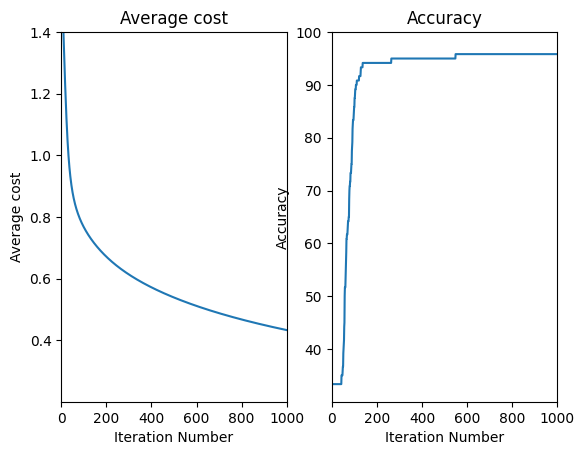

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

from google.colab import files
files.upload()

data = pd.read_csv('Iris.csv')

X = data.drop(['Id', 'Species'], axis=1).values
y = data['Species'].values

# 레이블을 숫자로 변환
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([species_mapping[species] for species in y])

# One-hot 인코딩
def one_hot_encode(y):
    n_classes = np.max(y) + 1
    return np.eye(n_classes)[y]

y = one_hot_encode(y)

# 데이터셋을 학습용과 테스트용으로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 소프트맥스 활성화 함수 정의
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def feed_forward(X, W1, b1, W2, b2):
    a1 = X
    z2 = np.dot(a1, W1) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W2) + b2
    output = softmax(z3)
    return a1, a2, output, z2, z3

def backward(X, y, a1, a2, output, W1, W2, b1, b2, learning_rate):
    m = X.shape[0]
    dz3 = output - y
    dw2 = np.dot(a2.T, dz3) / m
    db2 = np.sum(dz3, axis=0, keepdims=True) / m
    dz2 = np.dot(dz3, W2.T) * a2 * (1 - a2)
    dw1 = np.dot(a1.T, dz2) / m
    db1 = np.sum(dz2, axis=0, keepdims=True) / m

    W2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dw1
    b1 -= learning_rate * db1

    return W1, b1, W2, b2

# 하이퍼파라미터 설정
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 1000

# 가중치 및 bias 초기화
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses = []
accuracies = []

# 모델 학습
for epoch in range(epochs):
    # 순전파
    a1, a2, output, z2, z3 = feed_forward(X_train, W1, b1, W2, b2)

    # 역전파
    W1, b1, W2, b2 = backward(X_train, y_train, a1, a2, output, W1, W2, b1, b2, learning_rate)

    # 정확도 계산 및 저장
    predictions = np.argmax(output, axis=1)
    actual = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == actual) * 100
    accuracies.append(accuracy)

     # 비용 함수 계산 및 저장
    loss = -np.sum(y_train * np.log(output)) / len(y_train)
    losses.append(loss)



plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses)
plt.xlabel('Iteration Number')
plt.ylabel('Average cost')
plt.title('Average cost')
plt.xlim(0, epochs)
plt.ylim(0.2, 1.4)
plt.yticks(np.arange(0.4, 1.5, 0.2))

# 정확도 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracies)
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xlim(0, epochs)
plt.ylim(30, 100)
plt.yticks(np.arange(40,101, 10))

plt.show()